COMPARISION OF RESULTS
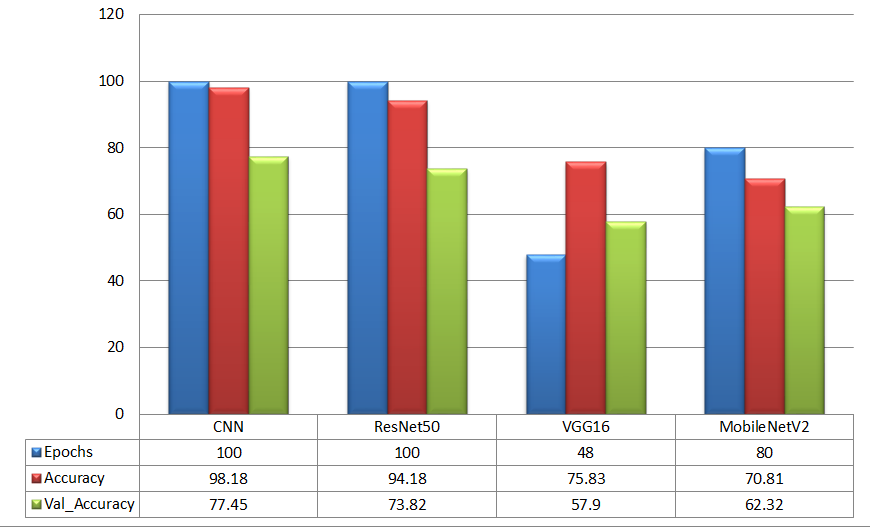

CNN

CNNs utilize convolutional layers to detect patterns and features, pooling layers to reduce spatial dimensions, and fully connected layers for classification. They excel in tasks such as image classification, object detection, and segmentation due to their ability to capture spatial hierarchies of features.

In [ ]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install keras

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
!pip install -U imbalanced-learn


Defaulting to user installation because normal site-packages is not writeable


In [ ]:
pip install opencv-python


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import os
import shutil
import pathlib
import PIL
import cv2
import time


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import random
import itertools


In [ ]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten, Dense, Activation
from tensorflow .keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau


In [ ]:
from PIL import Image, UnidentifiedImageError


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from timeit import default_timer as timer

In [ ]:
import warnings
warnings.filterwarnings("ignore")


In [ ]:
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)


print("All done")

All done


In [ ]:
Path_data = 'C:/Users/Admin/Downloads/archive'


In [ ]:
data = os.listdir(Path_data)
Healthy = os.listdir("C:/Users/Admin/Downloads/archive/Healthy")
Mild = os.listdir('C:/Users/Admin/Downloads/archive/Mild DR')
Moderate = os.listdir('C:/Users/Admin/Downloads/archive/Moderate DR')
Proliferate = os.listdir('C:/Users/Admin/Downloads/archive/Proliferate DR')
Severe = os.listdir('C:/Users/Admin/Downloads/archive/Severe DR')

In [ ]:
print("classes names :", (data), "\n______________________________\n")
print("Number of classes :", len(data), "\n______________________________\n")
print("Number of Healty images :", len(Healthy), "\n______________________________\n")
print("Number of Mild images :", len(Mild),  "\n______________________________\n")
print("Number of Moderate images :", len(Moderate),  "\n______________________________\n")
print("Number of Proliferate images :", len(Proliferate),  "\n______________________________\n")
print("Number of severe images :", len(Severe),  "\n______________________________\n")

classes names : ['Healthy', 'Mild DR', 'Moderate DR', 'Proliferate DR', 'Severe DR'] 
______________________________

Number of classes : 5 
______________________________

Number of Healty images : 1000 
______________________________

Number of Mild images : 370 
______________________________

Number of Moderate images : 900 
______________________________

Number of Proliferate images : 290 
______________________________

Number of severe images : 190 
______________________________



In [ ]:
Path_data = 'C:/Users/Admin/Downloads/archive'


In [ ]:
imgpaths = []
labels =[]

In [ ]:
data = os.listdir(Path_data)

In [ ]:

for i in data:
    classpath = os.path.join(Path_data, i)
    imglist = os.listdir(classpath)

    for img in imglist:
        imgpath = os.path.join(classpath, img)

        imgpaths.append(imgpath)
        labels.append(i)

In [ ]:
Paths = pd.Series(imgpaths, name = 'Paths')
Labels = pd.Series(labels, name = 'Labels')


In [ ]:

Df= pd.concat([Paths, Labels], axis = 1)
Df.head(5)

,Paths,Labels
0,C:/Users/Admin/Downloads/archive\Healthy\Healt...,Healthy
1,C:/Users/Admin/Downloads/archive\Healthy\Healt...,Healthy
2,C:/Users/Admin/Downloads/archive\Healthy\Healt...,Healthy
3,C:/Users/Admin/Downloads/archive\Healthy\Healt...,Healthy
4,C:/Users/Admin/Downloads/archive\Healthy\Healt...,Healthy


In [ ]:
train, testval = train_test_split(Df, test_size = 0.2, shuffle = True, random_state = 123)
valid, test = train_test_split(testval, test_size = 0.5, shuffle = True, random_state = 123)

print("Train shape: ", train.shape)
print("Valid shape: ", valid.shape)
print("Test shape: ",test.shape)

train.Labels.value_counts()

Train shape:  (2200, 2)
Valid shape:  (275, 2)
Test shape:  (275, 2)


Labels
Healthy           805
Moderate DR       723
Mild DR           291
Proliferate DR    230
Severe DR         151
Name: count, dtype: int64

In [ ]:
batch_size = 20   # As smaller, As more data generated ....In views of data size
img_size = (224, 224) # standard value (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

In [ ]:
tr_G = ImageDataGenerator(
    zca_whitening=True,
    rotation_range=30.,
    fill_mode='nearest',
    )

V_G = ImageDataGenerator()

t_G = ImageDataGenerator()

In [ ]:
Train = tr_G.flow_from_dataframe(train, x_col = 'Paths', y_col = 'Labels', target_size = img_size, class_mode = 'categorical', color_mode = 'rgb', shuffle = True, batch_size = batch_size)
Valid = V_G.flow_from_dataframe(valid, x_col = 'Paths', y_col = 'Labels', target_size = img_size, class_mode = 'categorical', color_mode = 'rgb', shuffle = True, batch_size = batch_size)
Test = t_G.flow_from_dataframe(test, x_col = 'Paths', y_col = 'Labels', target_size = img_size, class_mode = 'categorical', color_mode = 'rgb', shuffle = False, batch_size = batch_size)

Found 2200 validated image filenames belonging to 5 classes.
Found 275 validated image filenames belonging to 5 classes.
Found 275 validated image filenames belonging to 5 classes.


In [ ]:
L_index = Train.class_indices
L_index

{'Healthy': 0,
 'Mild DR': 1,
 'Moderate DR': 2,
 'Proliferate DR': 3,
 'Severe DR': 4}

In [ ]:
Keys = list(L_index.keys())
Keys

['Healthy', 'Mild DR', 'Moderate DR', 'Proliferate DR', 'Severe DR']

In [ ]:
imgs, labels = next(Train)

In [ ]:
plt.figure(figsize= (15, 15))

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

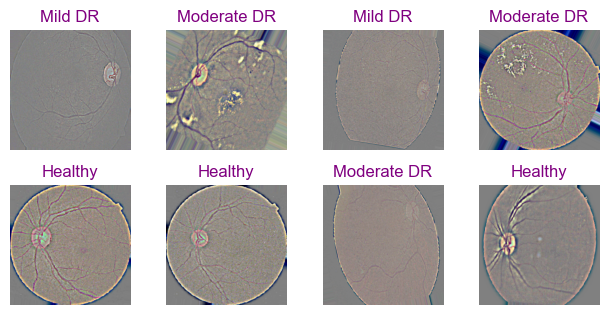

In [ ]:
for i in range(8):
    plt.subplot(3, 4, i +1)
    im = imgs[i]/255
    plt.imshow(im)

    #Labelling
    index = np.argmax(labels[i])
    label = Keys[index]
    plt.title(label, color = 'purple')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
n_classes = len(list(Train.class_indices.keys()))
n_classes

5

In [ ]:
img_shape=(img_size[0], img_size[1], 3)
model_name='EfficientNetB3'
base_model= EfficientNetB3(include_top=False, weights="imagenet",input_shape=img_shape, pooling='max')


In [ ]:
base_model.trainable=True
x=base_model.output
x=BatchNormalization(axis=-1, momentum=0.999, epsilon=0.001 )(x)
x = Dense(1024, kernel_regularizer = regularizers.l2(l = 0.01),activity_regularizer=regularizers.l1(0.005),
                bias_regularizer=regularizers.l1(0.005) ,activation='relu')(x)
x=Dropout(rate=.2, seed=123)(x)
x = Dense(512, kernel_regularizer = regularizers.l2(l = 0.01),activity_regularizer=regularizers.l1(0.005),
                bias_regularizer=regularizers.l1(0.005) ,activation='relu')(x)
x=Dropout(rate=.3, seed=123)(x)
x = Dense(256, kernel_regularizer = regularizers.l2(l = 0.01),activity_regularizer=regularizers.l1(0.005),
                bias_regularizer=regularizers.l1(0.005) ,activation='relu')(x)
x=Dropout(rate=.4, seed=123)(x)
output=Dense(n_classes, activation='softmax')(x)
model=Model(inputs=base_model.input, outputs=output)
lr=.0001

In [ ]:
model=Sequential()
model.add(base_model)
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512, activation='elu'))
model.add(Dense(256, activation='elu'))
model.add(Dense(128, activation = 'elu'))
model.add(Dense(5, activation='softmax'))

In [ ]:
model.compile(
    Adamax(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['acc']
)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional  (None, 1536)              10783535  
 )                                                               
                                                                 
 dropout_3 (Dropout)         (None, 1536)              0         
                                                                 
 flatten (Flatten)           (None, 1536)              0         
                                                                 
 dense_4 (Dense)             (None, 512)               786944    
                                                                 
 dense_5 (Dense)             (None, 256)               131328    
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                        

In [ ]:
pip install pydot

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install graphviz

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
epochs = 100
start = timer()
history = model.fit(x= Train, epochs= epochs, verbose= 1, validation_data= Valid, validation_steps= None, shuffle= True)
end = timer()
elapsed = end - start
print('Total Time Elapsed: ', int(elapsed//60), ' minutes ', (round(elapsed%60)), ' seconds')

Epoch 1/100
110/110 [==============================] - 387s 3s/step - loss: 1.6327 - acc: 0.4623 - val_loss: 1.4189 - val_acc: 0.4873
Epoch 2/100
110/110 [==============================] - 346s 3s/step - loss: 1.2437 - acc: 0.5736 - val_loss: 1.0605 - val_acc: 0.6000
Epoch 3/100
110/110 [==============================] - 340s 3s/step - loss: 1.0965 - acc: 0.6014 - val_loss: 0.9092 - val_acc: 0.6727
Epoch 4/100
110/110 [==============================] - 340s 3s/step - loss: 0.9952 - acc: 0.6332 - val_loss: 0.8754 - val_acc: 0.6982
Epoch 5/100
110/110 [==============================] - 342s 3s/step - loss: 0.9598 - acc: 0.6364 - val_loss: 0.8481 - val_acc: 0.7055
Epoch 6/100
110/110 [==============================] - 340s 3s/step - loss: 0.9006 - acc: 0.6495 - val_loss: 0.8618 - val_acc: 0.6873
Epoch 7/100
110/110 [==============================] - 338s 3s/step - loss: 0.8838 - acc: 0.6645 - val_loss: 0.8661 - val_acc: 0.6945
Epoch 8/100
110/110 [==============================] - 338s 3s

Epoch 62/100
110/110 [==============================] - 339s 3s/step - loss: 0.1203 - acc: 0.9573 - val_loss: 1.3466 - val_acc: 0.7636
Epoch 63/100
110/110 [==============================] - 340s 3s/step - loss: 0.1062 - acc: 0.9605 - val_loss: 1.2622 - val_acc: 0.7673
Epoch 64/100
110/110 [==============================] - 340s 3s/step - loss: 0.1043 - acc: 0.9641 - val_loss: 1.4029 - val_acc: 0.7636
Epoch 65/100
110/110 [==============================] - 340s 3s/step - loss: 0.1042 - acc: 0.9632 - val_loss: 1.3861 - val_acc: 0.7527
Epoch 66/100
110/110 [==============================] - 339s 3s/step - loss: 0.0986 - acc: 0.9664 - val_loss: 1.5069 - val_acc: 0.7709
Epoch 67/100
110/110 [==============================] - 339s 3s/step - loss: 0.1028 - acc: 0.9650 - val_loss: 1.4368 - val_acc: 0.7636
Epoch 68/100
110/110 [==============================] - 338s 3s/step - loss: 0.1120 - acc: 0.9618 - val_loss: 1.3901 - val_acc: 0.7673
Epoch 69/100
110/110 [==============================] -

In [ ]:
tr_acc = history.history['acc']
tr_loss = history.history['loss']

In [ ]:
v_acc = history.history['val_acc']
v_loss = history.history['val_loss']

In [ ]:
index_acc = np.argmax(v_acc)
high_Vacc = v_acc[index_acc]

In [ ]:
index_loss = np.argmin(v_loss)
low_Vloss = v_loss[index_loss]



In [ ]:
Epochs =[]
for i in range(len(tr_acc)):
    Epochs.append (i+1)


In [ ]:
best_acc = f'Best epoch ={str(index_acc +1)}'
best_loss = f'Best epoch ={str(index_loss+1)}'

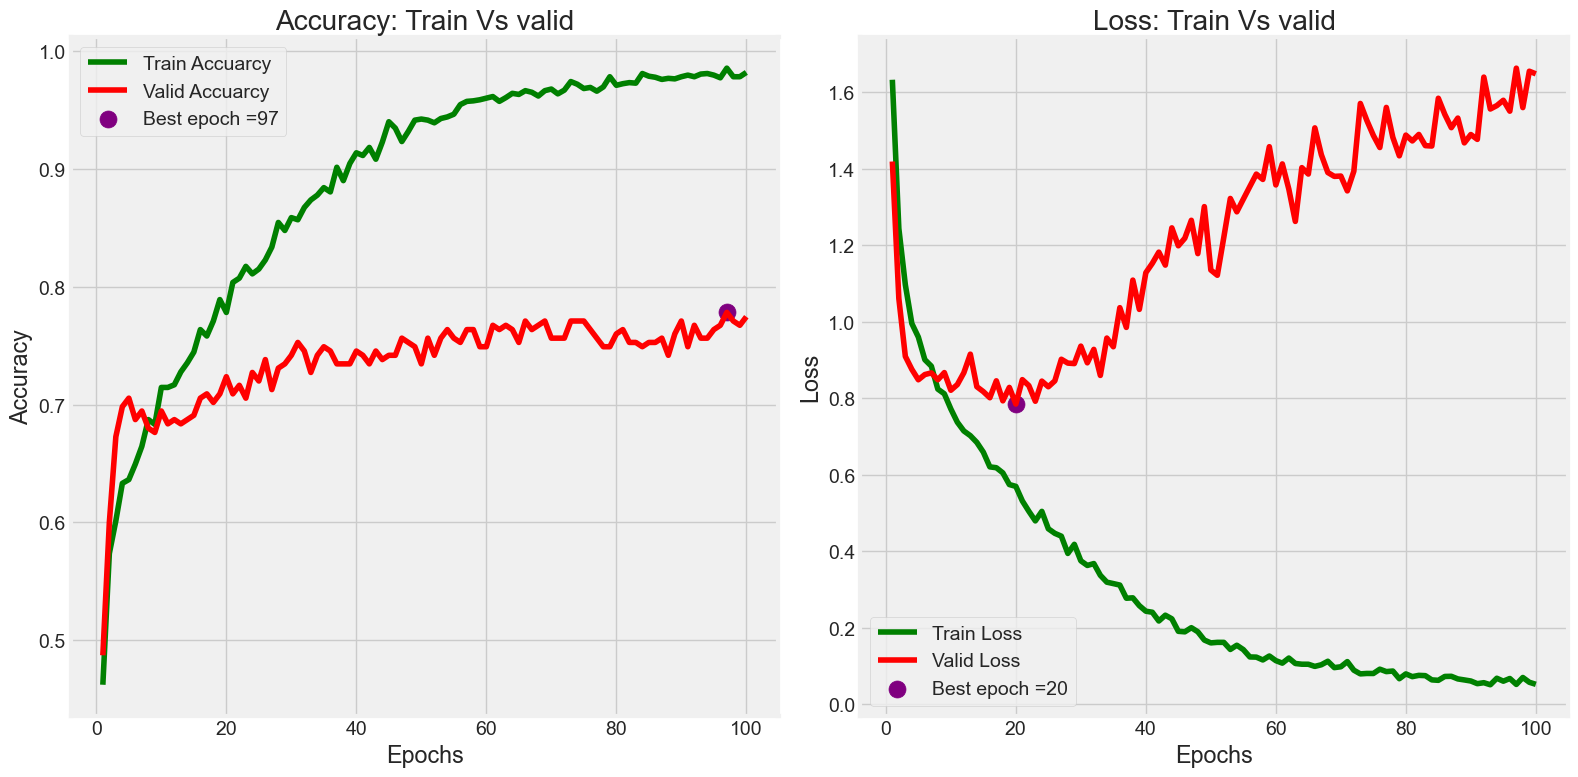

In [ ]:
plt.figure(figsize = (16, 8))
plt.style.use('fivethirtyeight')
plt.subplot(1,2,1)
plt.plot(Epochs, tr_acc, "g", label = "Train Accuarcy")
plt.plot(Epochs, v_acc, "r", label = "Valid Accuarcy")
plt.scatter(index_acc+1, high_Vacc, s= 150, color = 'purple', label = best_acc)
plt.title("Accuracy: Train Vs valid")
plt. xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(Epochs, tr_loss, "g", label = "Train Loss")
plt.plot(Epochs, v_loss, "r", label = "Valid Loss")
plt.scatter(index_loss+1, low_Vloss, s= 150, color = 'purple', label = best_loss)
plt.title("Loss: Train Vs valid")
plt. xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
Train_sc = model.evaluate(Train, verbose = 1)
Valid_sc = model.evaluate(Valid, verbose = 1)
Test_sc =model.evaluate(Test, verbose = 1)


14/14 [==============================] - 8s 566ms/step - loss: 1.5185 - acc: 0.7636


In [ ]:
#Print
print('Train Scores : \n    accuracy:', Train_sc[1], '\n      Loss: ', Train_sc[0], '\n________________________')
print('Valid Scores : \n    accuracy:', Valid_sc[1], '\n      Loss: ', Valid_sc[0], '\n________________________')
print('Test Scores : \n    accuracy:', Test_sc[1], '\n      Loss: ', Test_sc[0], '\n________________________')

Train Scores : 
    accuracy: 0.9918181896209717 
      Loss:  0.020980603992938995 
________________________
Valid Scores : 
    accuracy: 0.774545431137085 
      Loss:  1.6482001543045044 
________________________
Test Scores : 
    accuracy: 0.7636363506317139 
      Loss:  1.5184555053710938 
________________________


In [ ]:
predictions = model.predict_generator(Test)
y_pred = np.argmax(predictions, axis = 1)


In [ ]:
print(predictions)
print(y_pred)

[[9.9999821e-01 2.5807567e-10 1.7533130e-06 2.5230976e-12 2.5005012e-14]
 [9.9999964e-01 3.7486285e-07 2.9061262e-09 1.3904776e-10 1.7049684e-14]
 [2.4466103e-01 5.9740323e-01 1.5793480e-01 6.0225170e-07 4.4796968e-07]
 ...
 [2.1363527e-04 4.7468737e-04 9.9474984e-01 4.4659036e-03 9.5992138e-05]
 [1.0000000e+00 8.0693152e-10 3.0465946e-13 6.8735538e-22 1.3383761e-25]
 [7.1878982e-05 2.5805592e-04 1.9052882e-01 8.0669868e-01 2.4425709e-03]]
[0 0 1 3 2 2 2 2 2 2 1 0 0 1 3 4 2 2 1 0 1 0 0 2 2 2 2 0 2 2 2 0 1 4 0 1 2
 4 2 0 1 1 2 1 4 1 0 2 0 2 2 2 2 0 2 1 1 1 2 1 0 2 2 2 1 2 3 1 0 2 0 4 0 0
 2 2 0 1 0 0 2 2 1 2 0 4 0 2 2 3 1 3 2 1 1 2 0 2 2 1 0 2 0 3 0 0 0 0 0 2 2
 1 2 0 0 2 0 0 2 4 0 2 0 3 2 4 2 0 0 2 0 1 2 2 1 1 4 0 1 0 0 0 0 1 0 0 1 0
 0 4 0 0 1 0 2 0 1 2 2 2 1 2 0 2 2 1 0 2 2 0 2 0 2 1 0 2 0 1 3 2 0 0 1 4 1
 0 2 1 2 3 2 0 0 0 0 0 2 2 2 2 2 3 0 2 0 0 2 2 2 0 2 0 2 2 0 0 1 0 3 0 1 2
 2 0 2 2 0 2 0 0 2 0 0 0 1 4 1 0 2 2 2 0 1 1 0 4 0 0 0 0 0 2 2 1 1 0 0 0 0
 0 0 1 2 0 2 2 2 2 1 0 2 2 2 0 

In [ ]:
Test_cl_ind = Test.class_indices

# Get Keys
classes = list(Test_cl_ind.keys())

#CM
cm = confusion_matrix(Test.classes, y_pred)
cm

array([[92,  0,  0,  0,  0],
       [ 3, 29,  9,  0,  0],
       [ 5, 17, 72,  1,  5],
       [ 1,  2,  7, 11,  2],
       [ 0,  1, 12,  0,  6]], dtype=int64)

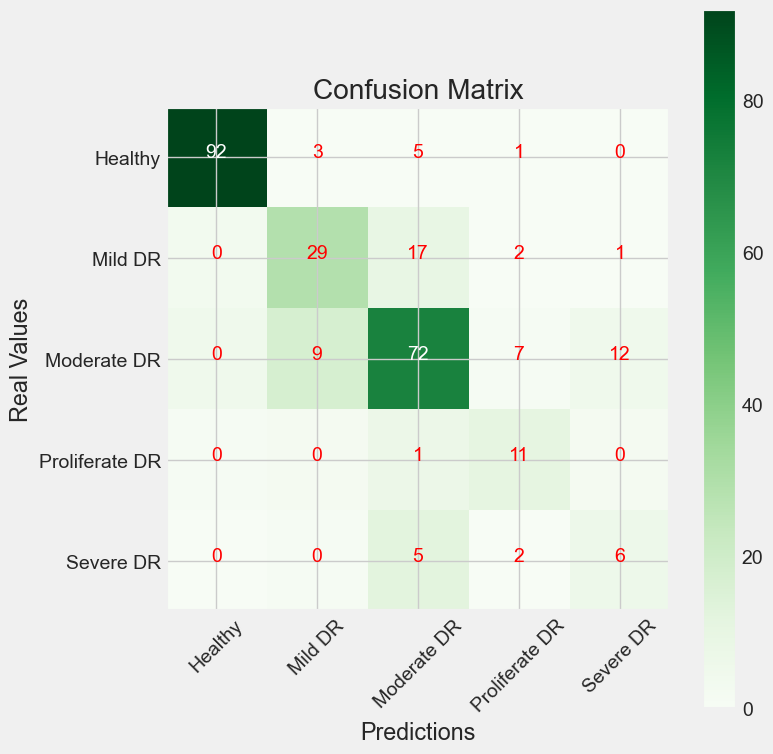

In [ ]:
plt.figure(figsize =(8, 8))
plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Greens)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes,rotation = 45)
plt.yticks(tick_marks, classes)
thresh = cm.max()/2
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(i, j, cm[i, j], horizontalalignment = 'center', color = 'white' if cm[i,j] > thresh  else 'red')

plt.tight_layout()
plt.xlabel('Predictions')
plt.ylabel('Real Values')
plt.show()


In [ ]:
print(classification_report(Test.classes, y_pred, target_names = classes))

                precision    recall  f1-score   support

       Healthy       0.91      1.00      0.95        92
       Mild DR       0.59      0.71      0.64        41
   Moderate DR       0.72      0.72      0.72       100
Proliferate DR       0.92      0.48      0.63        23
     Severe DR       0.46      0.32      0.37        19

      accuracy                           0.76       275
     macro avg       0.72      0.64      0.66       275
  weighted avg       0.76      0.76      0.76       275



In [ ]:
model.save('CNN DR.h5')